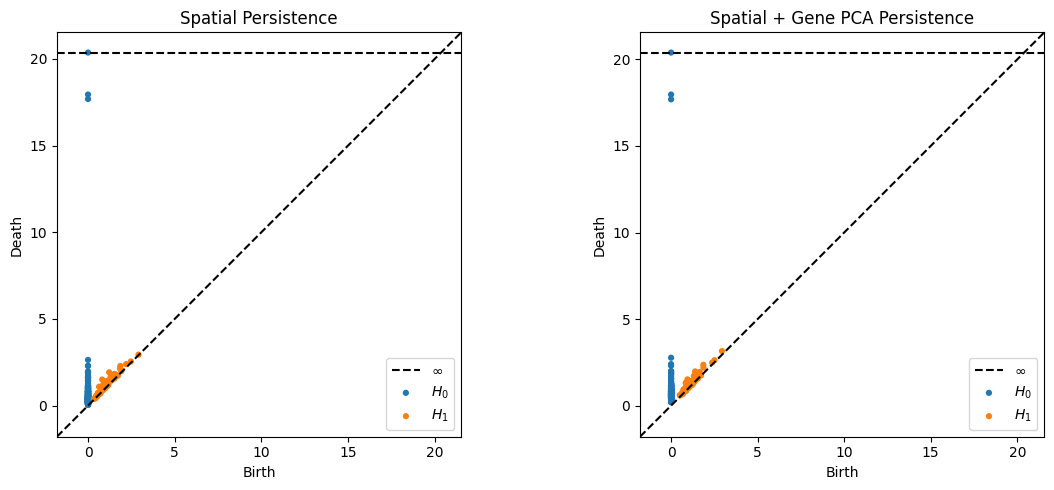

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

# Step 1: Generate synthetic Xenium-like data
np.random.seed(42)
centers = [(10, 10), (30, 30), (50, 10)]
points, gene_expr1 = [], []

for cx, cy in centers:
    x = np.random.normal(cx, 2, size=100)
    y = np.random.normal(cy, 2, size=100)
    g = np.random.rand(100, 5) + np.array([cx/50, cy/50, 0.2, 0.4, 0.6])
    points.append(np.stack([x, y], axis=1))
    gene_expr1.append(g)

spatial_coords = np.concatenate(points, axis=0)
gene_expr = np.concatenate(gene_expr1, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()


In [9]:
gene_expr1

[array([[1.07737307, 0.94076862, 0.89701574, 1.10248408, 0.95949115],
        [0.49359184, 1.00936116, 1.01011339, 1.26707232, 1.51324055],
        [0.7113424 , 0.70151629, 0.99829518, 1.04996393, 1.30196688],
        [0.99579267, 1.09000534, 0.53799516, 0.77558295, 0.69398194],
        [0.77828014, 0.23594227, 0.66559802, 0.94264463, 0.88654125],
        [0.79083326, 0.23050025, 0.23734819, 1.22260056, 0.96019064],
        [0.32706051, 0.72224326, 0.96999355, 0.61582103, 1.22289048],
        [0.28534746, 0.25168172, 0.73135463, 0.94063512, 1.2374299 ],
        [0.92609133, 1.17585208, 0.71630035, 0.72295647, 1.39518619],
        [0.47083225, 0.63897142, 0.27845638, 0.42535074, 1.56264841],
        [1.03598012, 0.89597421, 0.60895294, 0.57329432, 0.75643704],
        [0.4502429 , 0.74922666, 0.91459592, 1.06019738, 0.8799339 ],
        [1.15486528, 0.93789692, 0.75435405, 1.01172075, 1.01960006],
        [0.44773099, 0.55597268, 0.95784611, 0.41439349, 0.71607264],
        [0.24600264,

In [10]:
gene_expr = np.concatenate(gene_expr1, axis=0)
gene_expr

array([[1.07737307, 0.94076862, 0.89701574, 1.10248408, 0.95949115],
       [0.49359184, 1.00936116, 1.01011339, 1.26707232, 1.51324055],
       [0.7113424 , 0.70151629, 0.99829518, 1.04996393, 1.30196688],
       ...,
       [1.114933  , 0.29385728, 1.10962682, 1.06920026, 1.4292868 ],
       [1.8789789 , 0.77177235, 0.71744635, 0.83042741, 0.91694659],
       [1.43459596, 0.97387966, 0.80192343, 1.29252329, 1.04338001]])

In [7]:
points

[array([[10.99342831,  7.16925852],
        [ 9.7234714 ,  9.15870935],
        [11.29537708,  9.31457097],
        [13.04605971,  8.39544546],
        [ 9.53169325,  9.67742858],
        [ 9.53172609, 10.80810171],
        [13.15842563, 13.7723718 ],
        [11.53486946, 10.34915563],
        [ 9.06105123, 10.51510078],
        [11.08512009,  9.85110817],
        [ 9.07316461,  6.16245757],
        [ 9.06854049,  9.94697225],
        [10.48392454, 10.12046042],
        [ 6.17343951, 14.92648422],
        [ 6.55016433,  9.61527807],
        [ 8.87542494, 10.60309468],
        [ 7.97433776,  9.93057646],
        [10.62849467,  7.66264392],
        [ 8.18395185, 12.28564563],
        [ 7.1753926 , 11.50386607],
        [12.93129754, 11.58206389],
        [ 9.5484474 ,  8.18122509],
        [10.13505641, 12.80558862],
        [ 7.15050363,  7.19629787],
        [ 8.91123455, 11.17371419],
        [10.22184518, 14.38091125],
        [ 7.69801285,  8.01892735],
        [10.75139604,  8.867

In [6]:
spatial_coords

array([[10.99342831,  7.16925852],
       [ 9.7234714 ,  9.15870935],
       [11.29537708,  9.31457097],
       [13.04605971,  8.39544546],
       [ 9.53169325,  9.67742858],
       [ 9.53172609, 10.80810171],
       [13.15842563, 13.7723718 ],
       [11.53486946, 10.34915563],
       [ 9.06105123, 10.51510078],
       [11.08512009,  9.85110817],
       [ 9.07316461,  6.16245757],
       [ 9.06854049,  9.94697225],
       [10.48392454, 10.12046042],
       [ 6.17343951, 14.92648422],
       [ 6.55016433,  9.61527807],
       [ 8.87542494, 10.60309468],
       [ 7.97433776,  9.93057646],
       [10.62849467,  7.66264392],
       [ 8.18395185, 12.28564563],
       [ 7.1753926 , 11.50386607],
       [12.93129754, 11.58206389],
       [ 9.5484474 ,  8.18122509],
       [10.13505641, 12.80558862],
       [ 7.15050363,  7.19629787],
       [ 8.91123455, 11.17371419],
       [10.22184518, 14.38091125],
       [ 7.69801285,  8.01892735],
       [10.75139604,  8.86740454],
       [ 8.79872262,

Feature names: ['SAMD11' 'NOC2L' 'KLHL17' ... 'DDX3Y' 'TMSB4Y' 'KDM5D']


AttributeError: 'NoneType' object has no attribute 'to_csv'

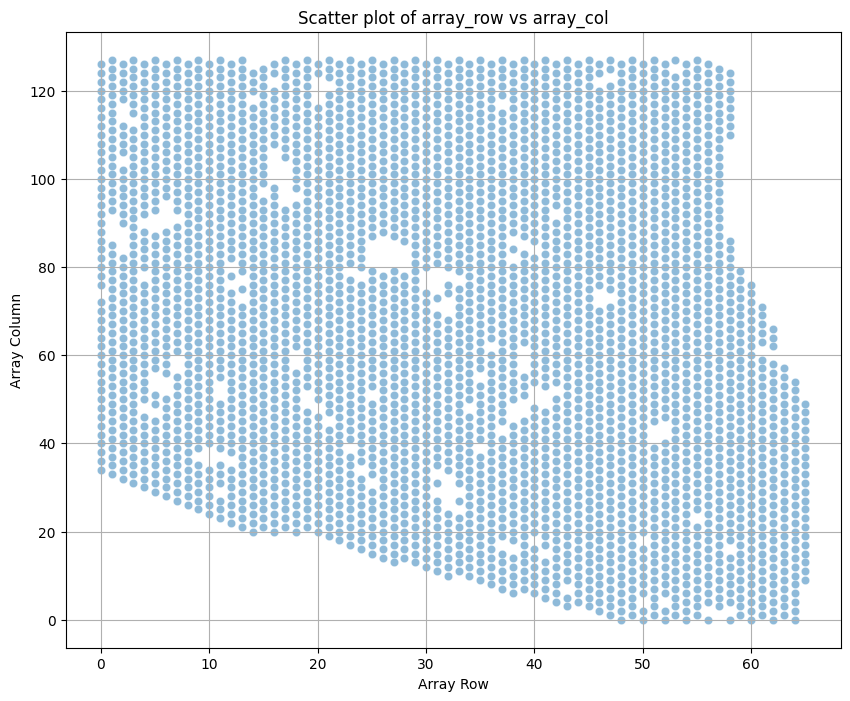